<a href="https://colab.research.google.com/github/rosiekwon/smart_healthcare/blob/main/WEEK%202/Simple_ITK_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 168 kB/s 


In [2]:
import SimpleITK as sitk
import numpy as np
import os
import matplotlib.pyplot as plt

Data Load

In [3]:
image_2d = sitk.Image(64,64,sitk.sitkFloat32)
print(image_2d)

Image (0x3028000)
  RTTI typeinfo:   itk::Image<float, 2u>
  Reference Count: 1
  Modified Time: 1666
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [64, 64]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [64, 64]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [64, 64]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x1fcae40)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference Count: 1
      Modified Time: 1667
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0x2dc2000
      Container

In [4]:
img_npy = sitk.GetArrayFromImage(image_2d)

print(img_npy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
!git clone https://github.com/FlashChoi5657/Deepnoid-Education.git

Cloning into 'Deepnoid-Education'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 556 (delta 42), reused 175 (delta 8), pack-reused 333
Receiving objects: 100% (556/556), 156.41 MiB | 13.81 MiB/s, done.
Resolving deltas: 100% (109/109), done.
Checking out files: 100% (332/332), done.


In [6]:
path = os.path.join('.','Deepnoid-Education/dataset')
filelist = os.listdir(path)
filelist

['test2.dcm',
 'label.nii.gz',
 'MRI',
 'xray_abd_chest',
 'lung_cancer',
 'test.dcm',
 'data.nii.gz']

In [7]:
dcm = sitk.ReadImage('./Deepnoid-Education/dataset/test2.dcm')
print(dcm)

Image (0x33f7440)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 1
  Modified Time: 1875
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1857
  UpdateMTime: 1871
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [2300, 2978, 1]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [2300, 2978, 1]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [2300, 2978, 1]
  Spacing: [0.143, 0.143, 1]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.143 0 0
0 0.143 0
0 0 1

  PointToIndexMatrix: 
6.99301 0 0
0 6.99301 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x3b1b1d0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned short>
      Reference Count: 1
      

In [8]:
arr = sitk.GetArrayFromImage(dcm)
arr.shape
#(z축, y축, x축)

(1, 2978, 2300)

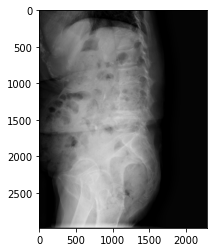

In [9]:
#3차원 이미지를 2차원으로 변환
plt.imshow(arr[0],cmap='gray')


Threshold

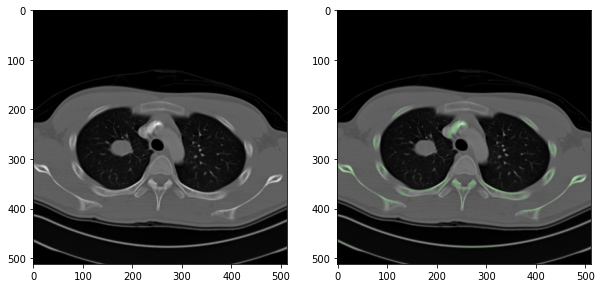

In [15]:
lung = sitk.ReadImage('./Deepnoid-Education/dataset/test.dcm')
lung_arr = sitk.GetArrayFromImage(lung)
threshold = 500
th_img = lung>threshold
ct_255 = sitk.Cast(sitk.RescaleIntensity(lung), sitk.sitkUInt8)
overlay = sitk.GetArrayFromImage(sitk.LabelOverlay(ct_255, th_img, opacity=0.2))

fig= plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(lung_arr[0],cmap='gray')
plt.subplot(122)
plt.imshow(overlay[0],cmap='gray')

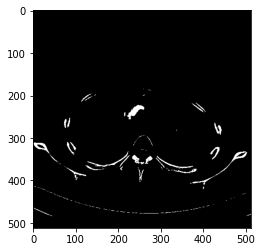

In [18]:
thr_arr = sitk.GetArrayFromImage(th_img)
plt.imshow(thr_arr[0],cmap='gray')
plt.show()

In [20]:
#여러개의 dicom파일 처리
def series_load(path):
  dicoms = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(path)
  reader = sitk.ImageSeriesReader()
  reader.LoadPrivateTagsOn()
  reader.MetaDataDictionaryArrayUpdateOn()
  reader.SetFileNames(dicoms)
  image3D= reader.Execute()

  return image3D

In [19]:
for a,b,c in os.walk(path,topdown=True):
  print(a,b,c)
  #경로,폴더,파일

./Deepnoid-Education/dataset ['MRI', 'xray_abd_chest', 'lung_cancer'] ['test2.dcm', 'label.nii.gz', 'test.dcm', 'data.nii.gz']
./Deepnoid-Education/dataset/MRI ['35623.000000-FLAIRreg-79237', '37908.000000-T2reg-21119', '11.000000-T1post-80644', '5388.000000-MaskTumor-63335', '34907.000000-T1prereg-43695'] ['readme.md']
./Deepnoid-Education/dataset/MRI/35623.000000-FLAIRreg-79237 [] ['1-13.dcm', '1-24.dcm', '1-15.dcm', '1-14.dcm', '1-20.dcm', '1-17.dcm', '1-03.dcm', '1-05.dcm', '1-12.dcm', '1-07.dcm', '1-19.dcm', '1-22.dcm', '1-11.dcm', '1-02.dcm', '1-10.dcm', '1-21.dcm', '1-04.dcm', '1-16.dcm', '1-09.dcm', '1-06.dcm', '1-23.dcm', '1-08.dcm', '1-18.dcm', '1-01.dcm']
./Deepnoid-Education/dataset/MRI/37908.000000-T2reg-21119 [] ['1-13.dcm', '1-24.dcm', '1-15.dcm', '1-14.dcm', '1-20.dcm', '1-17.dcm', '1-03.dcm', '1-05.dcm', '1-12.dcm', '1-07.dcm', '1-19.dcm', '1-22.dcm', '1-11.dcm', '1-02.dcm', '1-10.dcm', '1-21.dcm', '1-04.dcm', '1-16.dcm', '1-09.dcm', '1-06.dcm', '1-23.dcm', '1-08.dcm',

In [22]:
mri_series = series_load('./Deepnoid-Education/dataset/MRI/11.000000-T1post-80644/')
print(mri_series)

Image (0x3d84000)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 1
  Modified Time: 5192
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 4275
  UpdateMTime: 5188
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [260, 320, 24]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [260, 320, 24]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [260, 320, 24]
  Spacing: [0.6875, 0.6875, 6.5]
  Origin: [-83.3003, -115.806, -61.4529]
  Direction: 
0.998081 -1.68246e-11 -0.0619294
0.010241 0.986232 0.165048
0.0610768 -0.165365 0.984339

  IndexToPointMatrix: 
0.68618 -1.15669e-11 -0.402541
0.00704066 0.678035 1.07281
0.0419903 -0.113688 6.39821

  PointToIndexMatrix: 
1.45175 0.0148959 0.0888389
-2.44721e-11 1.43452 -0.240531
-0.0095276 0.0253919 0.151

In [24]:
mri_array = sitk.GetArrayFromImage(mri_series)
print(mri_array.shape)

(24, 320, 260)


In [30]:
def display(array):
  axes=[]
  fig = plt.figure(figsize=(20,20))
  for i in range(24):
    axes.append(fig.add_subplot(6,4,i+1))
    plt.imshow(array[i],cmap='gray')
  fig.tight_layout()
  plt.show()

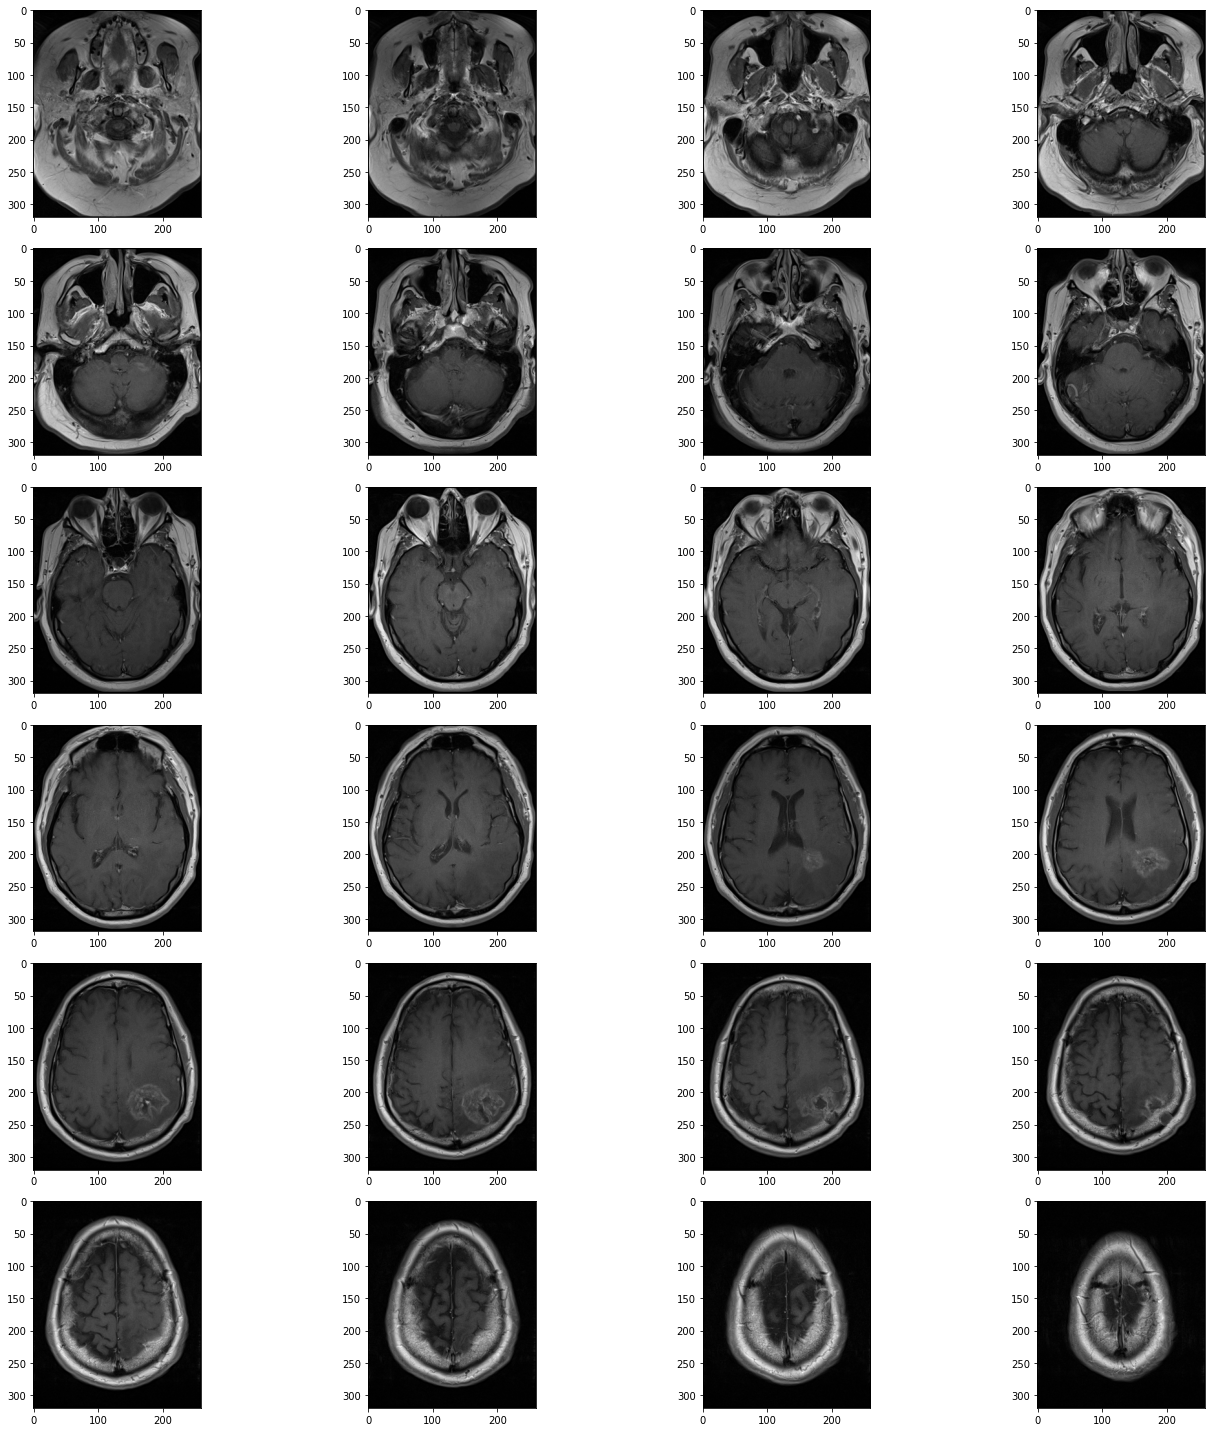

In [31]:
display(mri_array)

Min-Max normalization

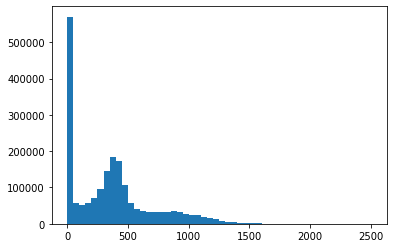

In [35]:
plt.hist(mri_array.flatten(),bins=50)
plt.show()

픽셀 간격 조정

In [41]:
print(mri_series.GetSize(), mri_series.GetSpacing())
rate=2

resample = sitk.ResampleImageFilter()
resample.SetInterpolator(sitk.sitkLinear)
resample.SetOutputDirection(mri_series.GetDirection())
resample.SetOutputOrigin(mri_series.GetOrigin())

x,y,z = mri_series.GetSpacing()
resample.SetOutputSpacing((x*rate,y*rate,z))

width,height,depth=mri_series.GetSize()
resample.SetSize((width//rate, height//rate, depth))

new_img = resample.Execute(mri_series)
print(new_img.GetSize(),new_img.GetSpacing())

(260, 320, 24) (0.6875, 0.6875, 6.499999911226572)
(130, 160, 24) (1.375, 1.375, 6.499999911226572)


Resize

In [45]:
def resize_array(sitk_image,size,interpolator=sitk.sitkLinear):
  original_spacing = sitk_image.GetSpacing()
  original_size = sitk_image.GetSize()
  new_spacing = [(ospc * osz / nsz) for osz,ospc,nsz in zip(original_size, original_spacing, size)]
  sitk_image = sitk.Resample(sitk_image, size, sitk.Transform(), interpolator, sitk_image.GetOrigin(), new_spacing, sitk_image.GetDirection(), 0, sitk_image.GetPixelID())

  return sitk_image


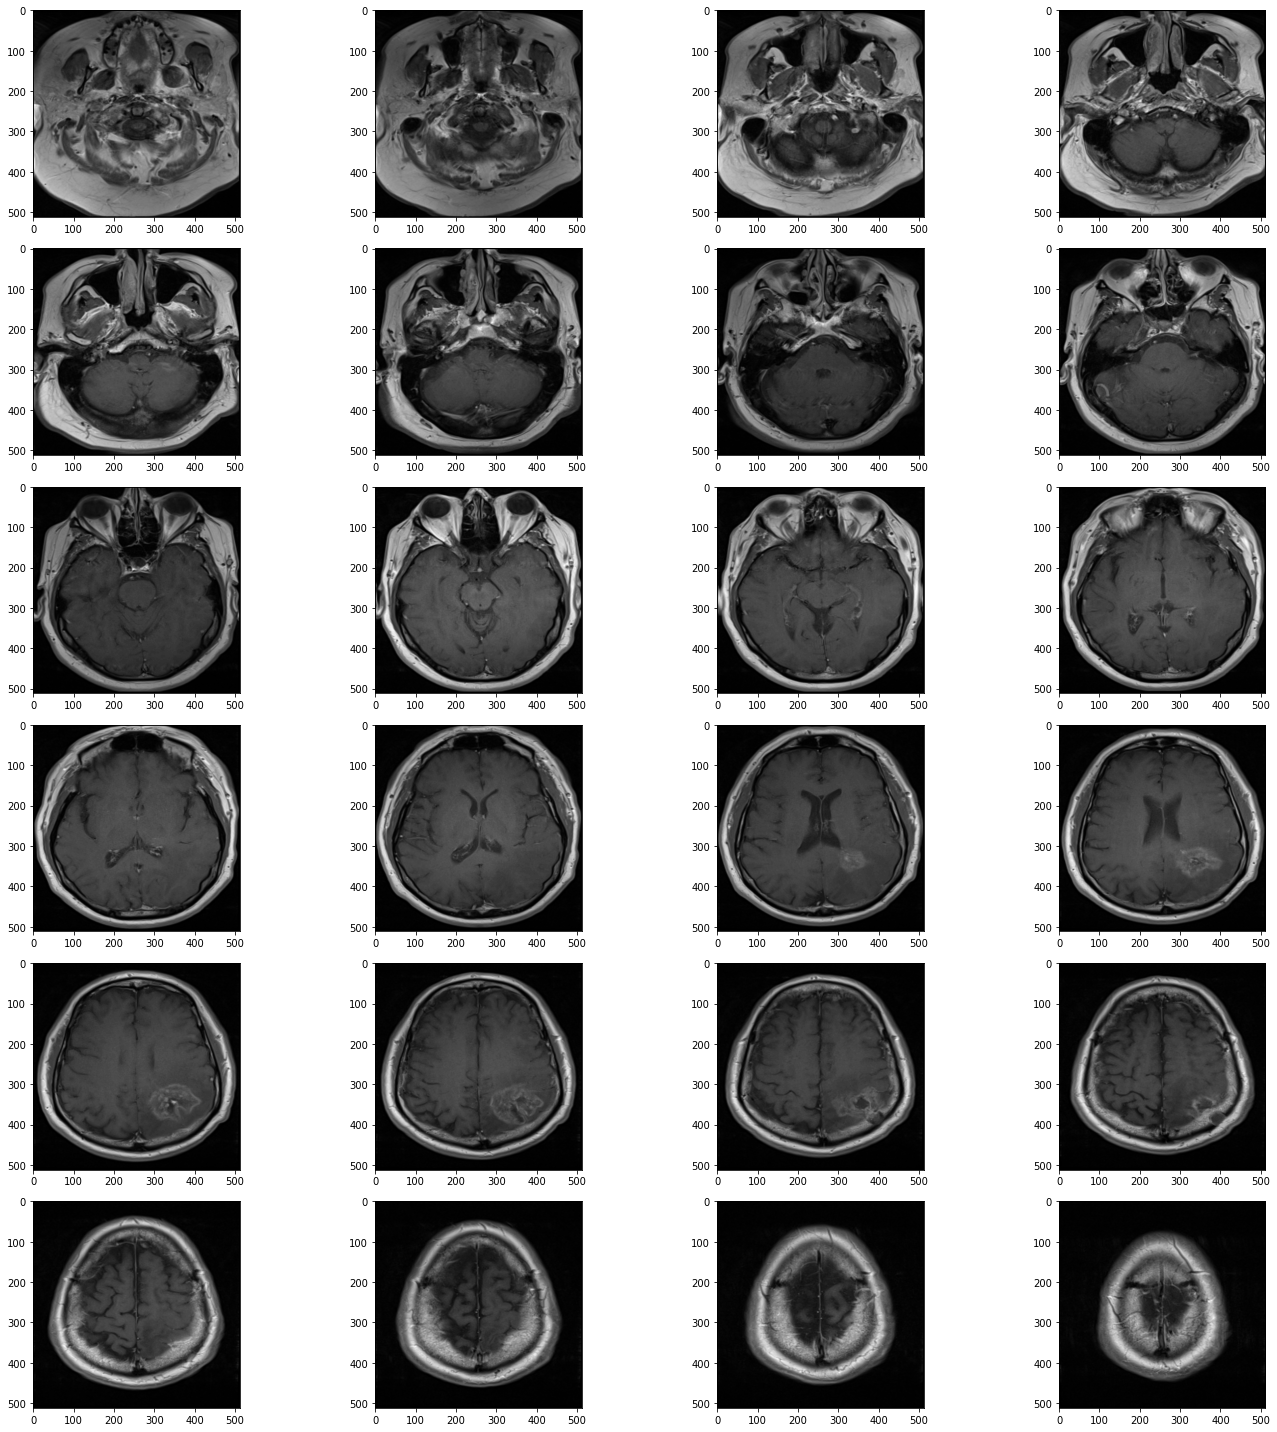

In [46]:
resize_img = resize_array(mri_series,(512,512,24))

display(sitk.GetArrayFromImage(resize_img))